In [4]:
import numpy as np
import mlrose_hiive as mlrose
import random
import time
import matplotlib.pyplot as plt
from utils import knapsack_generator, fit_iteration_test, time_iteration_test, test_param

In [5]:
#problems
problem_sizes = [4, 8, 16, 32, 64, 128]
alg_names = ['r_hill', 'SA', 'GA', 'MIMIC']
algorithms = [mlrose.random_hill_climb, mlrose.simulated_annealing, mlrose.genetic_alg, mlrose.mimic]
one_max_times = {
    'r_hill':[],
    'SA':[],
    'GA':[],
    'MIMIC':[]
}
four_peaks_times = {
    'r_hill':[],
    'SA':[],
    'GA':[],
    'MIMIC':[]
}
knapsack_times = {
    'r_hill':[],
    'SA':[],
    'GA':[],
    'MIMIC':[]
}

for length in problem_sizes:
    
    fitness_fn_one_max = mlrose.OneMax()
    prob_one_max = mlrose.DiscreteOpt(length=length, 
                                      fitness_fn=fitness_fn_one_max
                                     )
    one_max_problems.append(prob_one_max)
    
    fitness_fn_four_peaks = mlrose.FourPeaks()#t_pct=0.10
    prob_four_peaks = mlrose.DiscreteOpt(length=length, 
                                         fitness_fn=fitness_fn_four_peaks, 
                                         maximize=True
                                        )
    four_peaks_problems.append(prob_four_peaks)
    
    values, weights = knapsack_generator(length)
    max_weight_pct = 0.6
    fitness_fn_knapsack = mlrose.Knapsack(weights, values, max_weight_pct)
    prob_knapsack = mlrose.DiscreteOpt(length=len(weights), 
                                 fitness_fn=fitness_fn_knapsack
                                )
    knapsack_problems.append(prob_knapsack)


In [6]:
for length in problem_sizes:
        print("starting length ", length)
        fitness_fn_one_max = mlrose.OneMax()
        prob_one_max = mlrose.DiscreteOpt(length=length, 
                                          fitness_fn=fitness_fn_one_max
                                         )
        
        fitness_fn_four_peaks = mlrose.FourPeaks()#t_pct=0.10
        prob_four_peaks = mlrose.DiscreteOpt(length=length, 
                                                fitness_fn=fitness_fn_four_peaks, 
                                                maximize=True
                                               )

        values, weights = knapsack_generator(length)
        max_weight_pct = 0.6
        fitness_fn_knapsack = mlrose.Knapsack(weights, values, max_weight_pct)
        prob_knapsack = mlrose.DiscreteOpt(length=len(weights), 
                                     fitness_fn=fitness_fn_knapsack
                                    )
        #####execute#####
        print("onemax ")
        ###OneMax###
        start_time = time.time()
        state, fitness, curve = mlrose.random_hill_climb(problem=prob_one_max,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=100,
                                                         max_iters=10000,
                                                         restarts=10
                                                        )
        time_elapsed = time.time() - start_time
        one_max_times['r_hill'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.simulated_annealing(problem=prob_one_max,
                                                         curve=True,
                                                         max_attempts=80,
                                                         max_iters=10000, 
                                                         #schedule=mlrose.GeomDecay(init_temp=100, decay=0.95, min_temp=0.001)
                                                         #schedule=mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
                                                         schedule=mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),

                                                        )
        time_elapsed = time.time() - start_time
        one_max_times['SA'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.genetic_alg(problem=prob_one_max,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=10,
                                                         max_iters=10000, 
                                                         pop_size=256,
                                                         mutation_prob=0.1,
                                                        )
        time_elapsed = time.time() - start_time
        one_max_times['GA'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.mimic(problem=prob_one_max,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=10,
                                                         max_iters=10000, 
                                                         pop_size=256,
                                                         keep_pct=0.3,
                                                        )
        time_elapsed = time.time() - start_time
        one_max_times['MIMIC'].append(time_elapsed)
        
        ###Four Peaks###
        print("four peaks ")
        start_time = time.time()
        state, fitness, curve = mlrose.random_hill_climb(problem=prob_four_peaks,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=100,
                                                         max_iters=10000,
                                                         restarts=10
                                                        )
        time_elapsed = time.time() - start_time
        four_peaks_times['r_hill'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.simulated_annealing(problem=prob_four_peaks,
                                                         curve=True,
                                                         max_attempts=80,
                                                         max_iters=10000, 
                                                         #schedule=mlrose.GeomDecay(init_temp=100, decay=0.95, min_temp=0.001)
                                                         #schedule=mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
                                                         schedule=mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),

                                                        )
        time_elapsed = time.time() - start_time
        four_peaks_times['SA'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.genetic_alg(problem=prob_four_peaks,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=10,
                                                         max_iters=10000, 
                                                         pop_size=256,
                                                         mutation_prob=0.1,
                                                        )
        time_elapsed = time.time() - start_time
        four_peaks_times['GA'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.mimic(problem=prob_four_peaks,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=10,
                                                         max_iters=10000, 
                                                         pop_size=256,
                                                         keep_pct=0.3,
                                                        )
        time_elapsed = time.time() - start_time
        four_peaks_times['MIMIC'].append(time_elapsed)
        
        ###Knapsack###
        print("knapsack ")
        start_time = time.time()
        state, fitness, curve = mlrose.random_hill_climb(problem=prob_knapsack,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=100,
                                                         max_iters=10000,
                                                         restarts=10
                                                        )
        time_elapsed = time.time() - start_time
        knapsack_times['r_hill'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.simulated_annealing(problem=prob_knapsack,
                                                         curve=True,
                                                         max_attempts=80,
                                                         max_iters=10000, 
                                                         #schedule=mlrose.GeomDecay(init_temp=100, decay=0.95, min_temp=0.001)
                                                         #schedule=mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
                                                         schedule=mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),

                                                        )
        time_elapsed = time.time() - start_time
        knapsack_times['SA'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.genetic_alg(problem=prob_knapsack,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=10,
                                                         max_iters=10000, 
                                                         pop_size=2048,
                                                         mutation_prob=0.5,
                                                        )
        time_elapsed = time.time() - start_time
        knapsack_times['GA'].append(time_elapsed)
        start_time = time.time()
        state, fitness, curve = mlrose.mimic(problem=prob_knapsack,
                                                         curve=True,
                                                         random_state=13,
                                                         max_attempts=10,
                                                         max_iters=10000, 
                                                         pop_size=2048,
                                                         keep_pct=0.35,
                                                        )
        time_elapsed = time.time() - start_time
        knapsack_times['MIMIC'].append(time_elapsed)

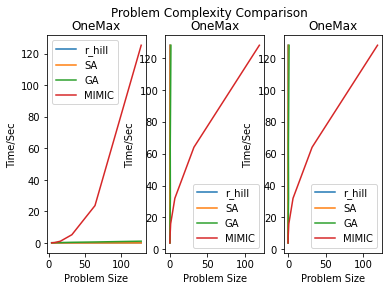

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Problem Complexity Comparison')

ax1.plot(problem_sizes, one_max_times['r_hill'], label="r_hill")
ax1.plot(problem_sizes, one_max_times['SA'], label="SA")
ax1.plot(problem_sizes, one_max_times['GA'], label="GA")
ax1.plot(problem_sizes, one_max_times['MIMIC'], label="MIMIC")
ax1.set_xlabel ('Problem Size')
ax1.set_ylabel ('Time/Sec')
ax1.legend()
ax1.set_title ('OneMax')

ax2.plot(four_peaks_times['r_hill'],problem_sizes, label="r_hill")
ax2.plot(four_peaks_times['SA'],problem_sizes, label="SA")
ax2.plot(four_peaks_times['GA'],problem_sizes, label="GA")
ax2.plot(four_peaks_times['MIMIC'],problem_sizes, label="MIMIC")
ax2.set_xlabel ('Problem Size')
ax2.set_ylabel ('Time/Sec')
ax2.legend()
ax2.set_title ('OneMax')

ax3.plot(four_peaks_times['r_hill'],problem_sizes, label="r_hill")
ax3.plot(four_peaks_times['SA'],problem_sizes, label="SA")
ax3.plot(four_peaks_times['GA'],problem_sizes, label="GA")
ax3.plot(four_peaks_times['MIMIC'],problem_sizes, label="MIMIC")
ax3.set_xlabel ('Problem Size')
ax3.set_ylabel ('Time/Sec')
ax3.legend()
ax3.set_title ('OneMax')

plt.show()


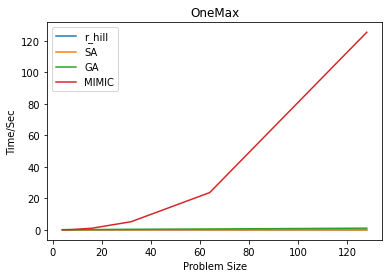

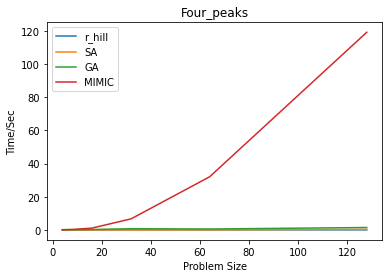

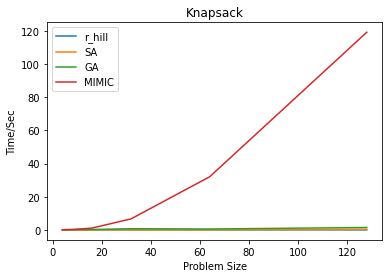

In [15]:
plt.plot(problem_sizes, one_max_times['r_hill'], label="r_hill")
plt.plot(problem_sizes, one_max_times['SA'], label="SA")
plt.plot(problem_sizes, one_max_times['GA'], label="GA")
plt.plot(problem_sizes, one_max_times['MIMIC'], label="MIMIC")
plt.xlabel ('Problem Size')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('OneMax')
plt.show()

plt.plot(problem_sizes, four_peaks_times['r_hill'],label="r_hill")
plt.plot(problem_sizes, four_peaks_times['SA'], label="SA")
plt.plot(problem_sizes, four_peaks_times['GA'], label="GA")
plt.plot(problem_sizes, four_peaks_times['MIMIC'], label="MIMIC")
plt.xlabel ('Problem Size')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('Four_peaks')
plt.show()

plt.plot(problem_sizes, four_peaks_times['r_hill'], label="r_hill")
plt.plot(problem_sizes, four_peaks_times['SA'], label="SA")
plt.plot(problem_sizes, four_peaks_times['GA'], label="GA")
plt.plot(problem_sizes, four_peaks_times['MIMIC'], label="MIMIC")
plt.xlabel ('Problem Size')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('Knapsack')
plt.show()

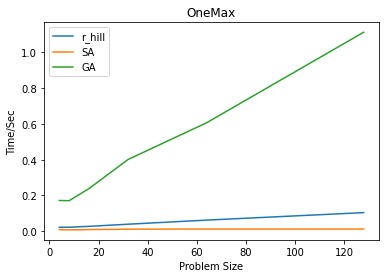

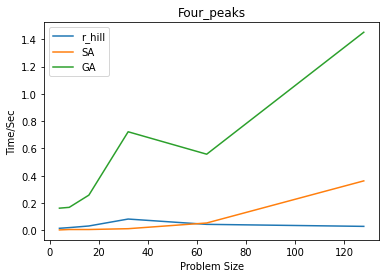

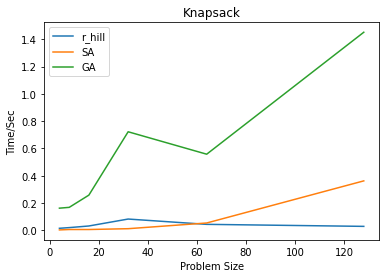

In [16]:
plt.plot(problem_sizes, one_max_times['r_hill'], label="r_hill")
plt.plot(problem_sizes, one_max_times['SA'], label="SA")
plt.plot(problem_sizes, one_max_times['GA'], label="GA")
#plt.plot(problem_sizes, one_max_times['MIMIC'], label="MIMIC")
plt.xlabel ('Problem Size')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('OneMax')
plt.show()

plt.plot(problem_sizes, four_peaks_times['r_hill'],label="r_hill")
plt.plot(problem_sizes, four_peaks_times['SA'], label="SA")
plt.plot(problem_sizes, four_peaks_times['GA'], label="GA")
#plt.plot(problem_sizes, four_peaks_times['MIMIC'], label="MIMIC")
plt.xlabel ('Problem Size')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('Four_peaks')
plt.show()

plt.plot(problem_sizes, four_peaks_times['r_hill'], label="r_hill")
plt.plot(problem_sizes, four_peaks_times['SA'], label="SA")
plt.plot(problem_sizes, four_peaks_times['GA'], label="GA")
#plt.plot(problem_sizes, four_peaks_times['MIMIC'], label="MIMIC")
plt.xlabel ('Problem Size')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('Knapsack')
plt.show()